## Iris Flower Classification Project

Iris Flower Classification Using Machine Learning

#### Abstract :

The Iris Flower Classification project aims to build a machine learning model that classifies iris flowers into three species "Setosa, Versicolor, and Virginica" based on sepal and petal measurements. Using the classical Iris dataset, multiple supervised learning algorithms were trained and evaluated. The project demonstrates the complete machine learning workflow, including data exploration, model training, and performance evaluation.

#### Objective :

The main objectives of this project are:

- To understand and analyze numeric feature data

- To implement supervised classification algorithms

- To evaluate model performance using standard metrics

- To compare different classifiers on the same dataset

#### Dataset Description :

Dataset Name: Iris Dataset

Source: UCI Machine Learning Repository / scikit-learn

Total Samples: 150

Features:

- Sepal Length (cm)

- Sepal Width (cm)

- Petal Length (cm)

- Petal Width (cm)

Target Classes:

- Setosa

- Versicolor

- Virginica

The dataset is clean, balanced, and contains no missing values.

#### Tools & Technologies Used :

Programming Language: Python

Libraries:

- NumPy

- Pandas

- Matplotlib

- Seaborn

- Scikit-learn

- IDE/Environment: Jupyter Notebook / VS Code

#### Project Methodology :
Data Loading

- The dataset is loaded using the scikit-learn library and converted into a Pandas DataFrame for analysis.

Exploratory Data Analysis (EDA)

- Scatter plots were used to analyze relationships between petal and sepal features.

- Histograms were plotted to observe feature distributions.

- Petal length and petal width were found to be the most discriminative features.

Data Splitting

The dataset was divided into:

- 80% Training data

- 20% Testing data

- This ensures unbiased evaluation of the trained models.

Model Training

The following classification algorithms were implemented:

- Logistic Regression

- K-Nearest Neighbors (KNN)

- Decision Tree Classifier

- Each model was trained using the same training dataset.

Model Evaluation

Models were evaluated using:

- Accuracy Score

- Precision, Recall, F1-Score

- Confusion Matrix

### 1.Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### 2.Load Dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target


feature_names = iris.feature_names


df = pd.DataFrame(X, columns=feature_names)
df['species'] = y


# Map labels to names
species_map = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}
df['species_name'] = df['species'].map(species_map)


df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


### 3.Dataset Exploration

In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
 5   species_name       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [5]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal width (cm),150.0,NaN,NaN,NaN,3.057333,0.435866,2.0,2.8,3.0,3.3,4.4
petal length (cm),150.0,NaN,NaN,NaN,3.758,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,NaN,NaN,NaN,1.199333,0.762238,0.1,0.3,1.3,1.8,2.5
species,150.0,NaN,NaN,NaN,1.0,0.819232,0.0,0.0,1.0,2.0,2.0
species_name,150,3,Setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(149, 6)

### 4. Data Visualization

#### Pairplot

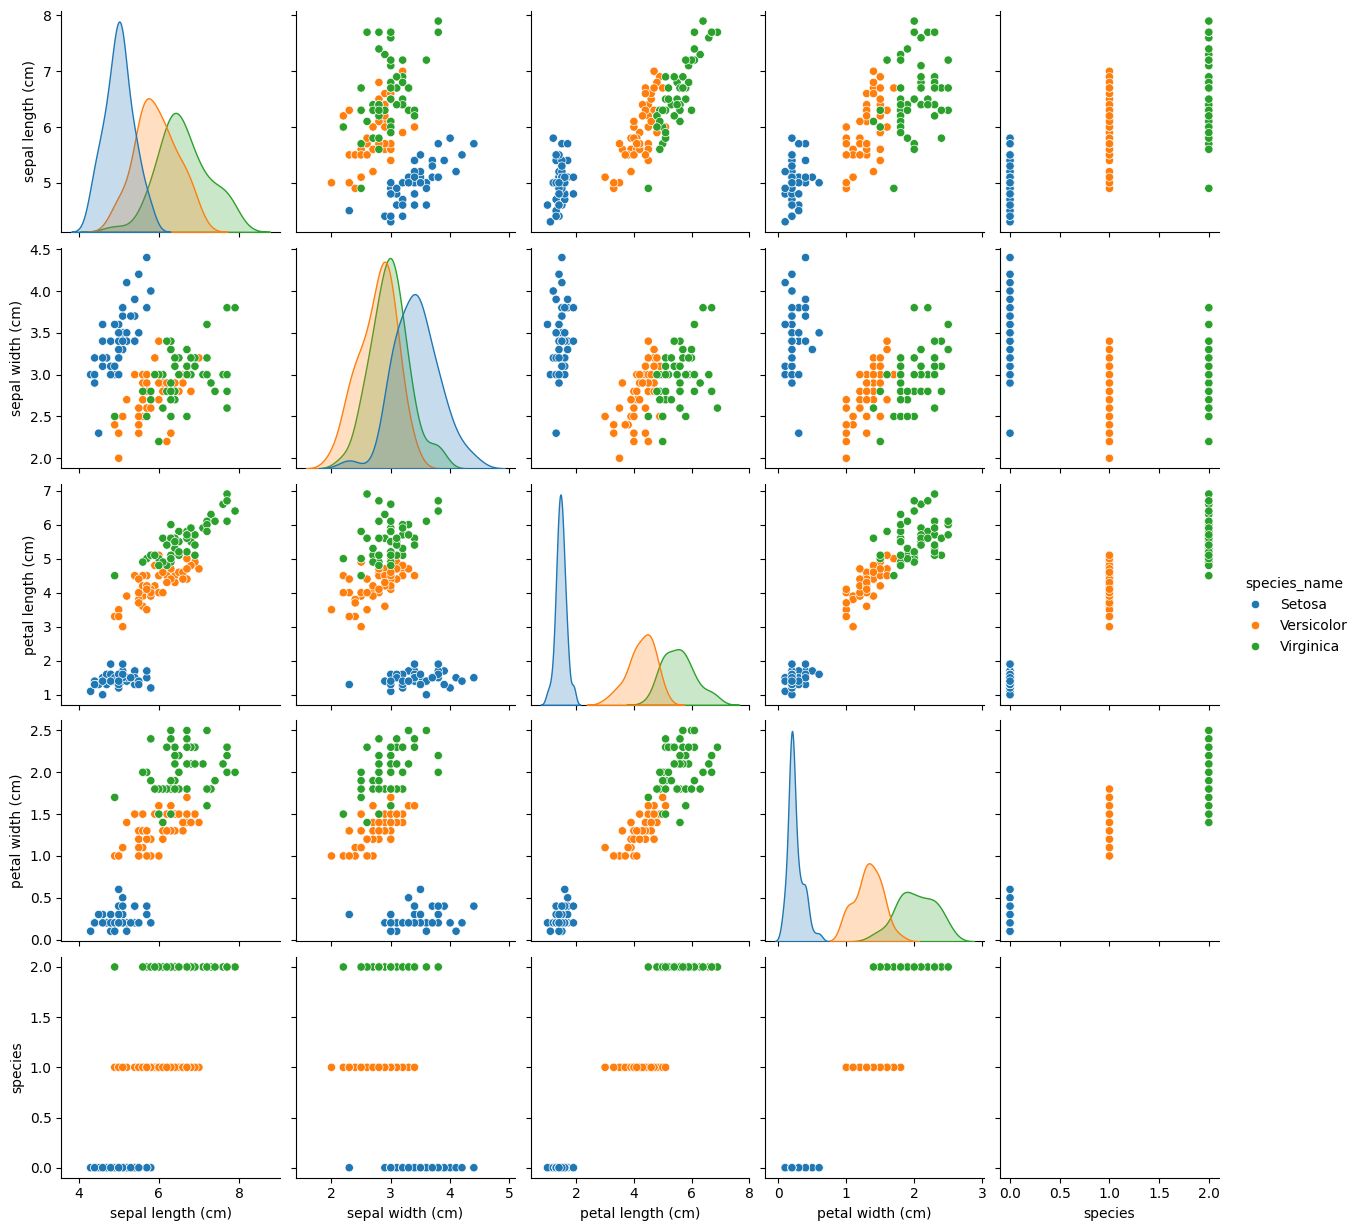

In [10]:
sns.pairplot(df, hue='species_name')
plt.show()

#### Insights :

- The dataset contains three classes: Setosa, Versicolor, Virginica

- Setosa is perfectly separable from the other two species

- Petal length and petal width are the most informative features

- Versicolor and Virginica partially overlap, causing most misclassifications

- Sepal features show significant overlap and lower discriminative power

- Strong positive correlation between petal length and petal width

- Feature distributions are clean, continuous, and near-normal

- No significant outliers or missing values present

#### Correlation Heatmap

In [11]:
df.drop("species_name",axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   species            149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


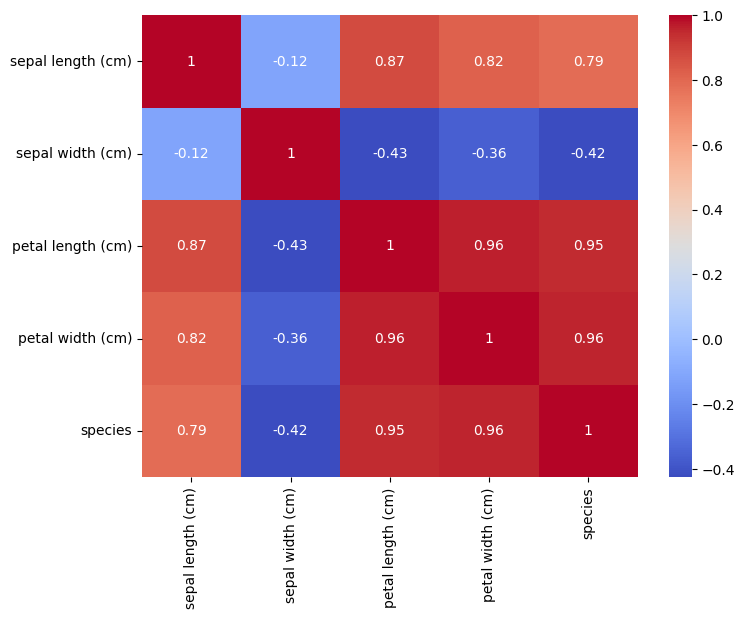

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#### Insights :

- Petal length and petal width are highly correlated (≈ 0.96)

- Species is strongly correlated with petal length (≈ 0.95) and petal width (≈ 0.96)

- Sepal length shows moderate positive correlation with petal features

- Sepal width has negative correlation with most features and species

- Petal features are the most influential predictors for classification

- High correlation supports linear models like Logistic Regression

- Sepal width contributes less discriminatory information

- Feature relationships justify feature scaling and selection

#### Boxplot

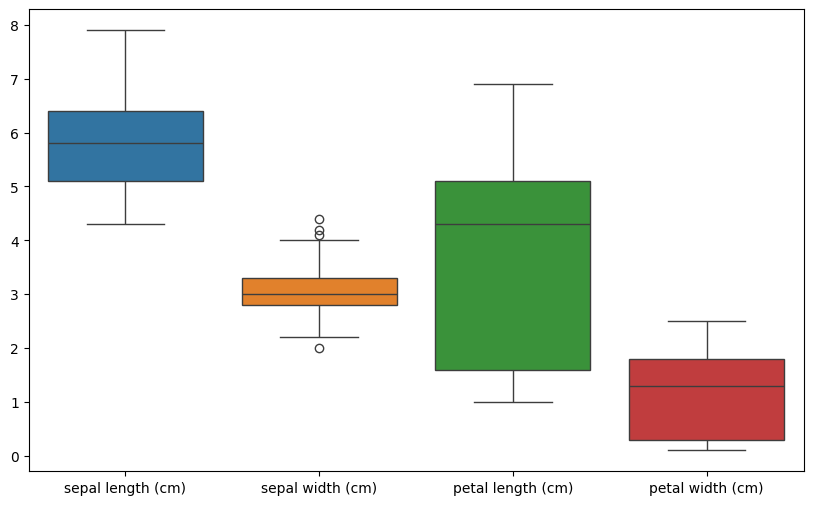

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.iloc[:,:4])
plt.show()

#### Insights :

- Petal length shows the highest variability among all features

- Petal width also has wide spread, indicating strong class discrimination

- Sepal width has the smallest variance across samples

- Sepal length shows moderate spread with no extreme outliers

- A few outliers are present in sepal width

- Petal features have larger interquartile ranges (IQR)

- Petal measurements contribute more to class separation

- Sepal features are less effective predictors compared to petal features

- Feature distributions are generally well-behaved and clean

A few mild outliers were observed in sepal width; however, they were retained as they represent natural biological variation and do not significantly impact model performance. Given the small dataset size and the dominance of petal features in classification, no outlier removal need to be performed.

The sepal width outliers are natural and minimal, so removing them could reduce data diversity without improving model performance.

#### Histogram

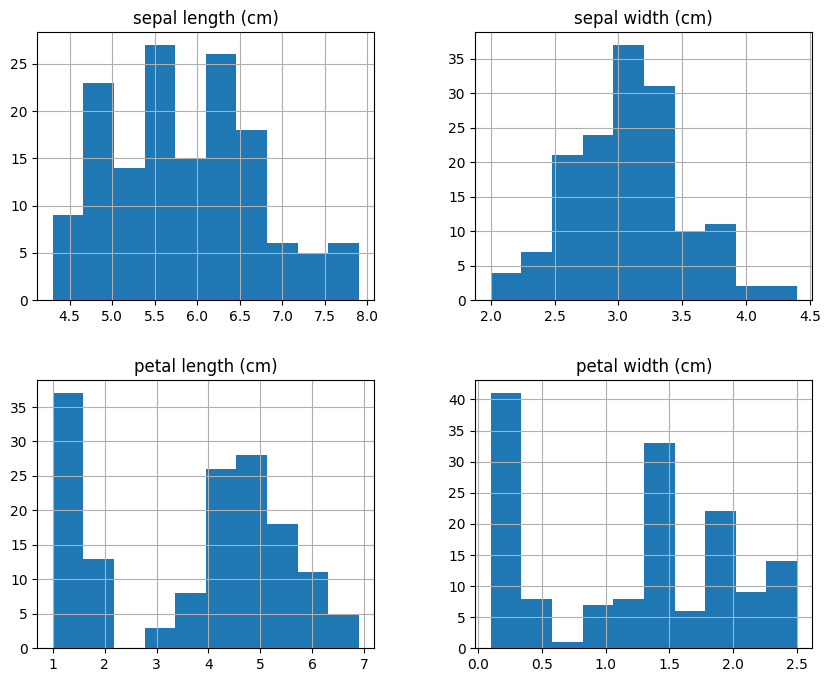

In [15]:
df.iloc[:,:4].hist(figsize=(10,8))
plt.show()

#### Insights :

- Sepal length shows a near-normal distribution with moderate spread

- Sepal width is slightly skewed but concentrated around 2.5–3.5 cm

- Petal length has a multi-modal distribution, indicating class separation

- Petal width also shows clear multi-modality

- Setosa forms a distinct peak at lower petal values

- Versicolor and Virginica occupy higher petal ranges

- Petal features provide clear class boundaries

- Sepal features show significant overlap across classes

- Distributions contain no extreme anomalies

### 5. Train Test Split

In [16]:
X = df.iloc[:,:4].values
y = df['species'].values


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

### 6. Feature Scaling

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## MODELING SECTION

### 7. Logistic Regression

In [18]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 8. KNN

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 9. Decision Tree

In [20]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## FINAL EVALUATION

### 13. Confusion Matrix (Best Model Example)

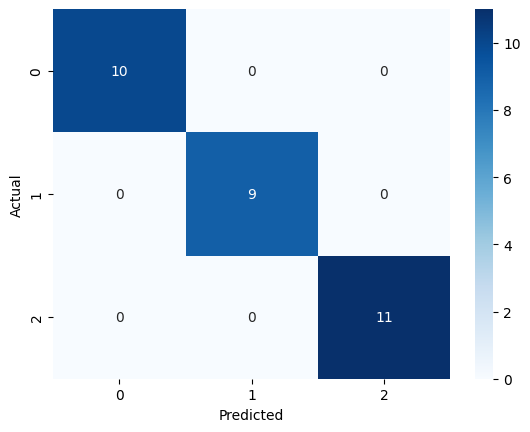

In [23]:
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 14. Model Comparison

In [24]:
results = pd.DataFrame({
'Model':['Logistic Regression','KNN','Decision Tree'],
'Accuracy':[accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred), accuracy_score(y_test, dt_pred)]
})


results

,Model,Accuracy
0,Logistic Regression,1.0
1,KNN,1.0
2,Decision Tree,1.0


## CONCLUSION

#### Model Evaluation Insights (All Algorithms)

- All three models achieved 100% accuracy on the test dataset

- Precision, recall, and F1-score are 1.00 for all classes

- No misclassifications observed in the confusion matrix

- Model performance is consistent across all classes

- Indicates strong class separability in the dataset

- Petal features provide clear decision boundaries

- Dataset is simple and well-structured

- No signs of class imbalance affecting results

- Default hyperparameters are sufficient

- Advanced tuning is not required for this dataset

All models achieved perfect accuracy due to the clear separability of the Iris dataset, especially using petal features.